Stemming and lemmatization are two popular techniques to reduce a given word to its base word. Stemming uses a fixed set of rules to remove suffixes, and prefixes whereas lemmatization use language knowledge to come up with a correct base word. Stemming will be demonstrated in ntlk (spacy doesn't support stemming) whereas code for lemmatization is written in spacy

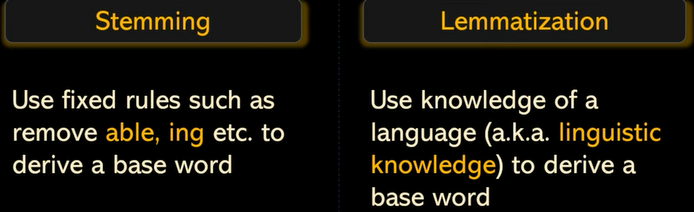

In [1]:
import nltk
import spacy

Stemming in NLTK

In [2]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [3]:
words = ["eating", "eats", "eat", "ate", "adjustable", "rafting", "ability", "meeting"]

for word in words:
  print(word, "|", stemmer.stem(word))
  

eating | eat
eats | eat
eat | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


Lemmatization in spacy

In [8]:
nlp = spacy.load("en_core_web_sm")

doc = nlp("eating eats eat ate adjustable rafting ability meeting better")

for token in doc:
  print(token, "|", token.lemma_, "|", token.lemma)

eating | eating | 12092082220177030354
eats | eat | 9837207709914848172
eat | eat | 9837207709914848172
ate | eat | 9837207709914848172
adjustable | adjustable | 6033511944150694480
rafting | raft | 7154368781129989833
ability | ability | 11565809527369121409
meeting | meet | 6880656908171229526
better | well | 4525988469032889948


In [12]:


doc = nlp("Mando talked for 3 hours although talking isn't his thing he became talkative")

for token in doc:
  print(token, "|", token.lemma_, "|", token.lemma)

Mando | Mando | 7837215228004622142
talked | talk | 13939146775466599234
for | for | 16037325823156266367
3 | 3 | 602994839685422785
hours | hour | 9748623380567160636
although | although | 343236316598008647
talking | talk | 13939146775466599234
is | be | 10382539506755952630
n't | not | 447765159362469301
his | his | 2661093235354845946
thing | thing | 2473243759842082748
he | he | 1655312771067108281
became | become | 12558846041070486771
talkative | talkative | 13364764166055324990


customizing lemmatizer using attribute_ruler

In [11]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [13]:
doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")

for token in doc:
  print(token, "|", token.lemma_, "|", token.lemma)

Bro | Bro | 16427154408071002123
, | , | 2593208677638477497
you | you | 7624161793554793053
wanna | wanna | 13000462173222681081
go | go | 8004577259940138793
? | ? | 8205403955989537350
Brah | Brah | 5645766505577852541
, | , | 2593208677638477497
do | do | 2158845516055552166
n't | not | 447765159362469301
say | say | 8685289367999165211
no | no | 13055779130471031426
! | ! | 17494803046312582752
I | I | 4690420944186131903
am | be | 10382539506755952630
exhausted | exhaust | 5738807065439247694


customization to understand slang

In [15]:
ar = nlp.get_pipe("attribute_ruler")

ar.add([[{"TEXT": "Bro"}], [{"TEXT": "Brah"}]], {"LEMMA": "Brother"})

doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")

for token in doc:
  print(token, "|", token.lemma_, "|", token.lemma)

Bro | Brother | 4347558510128575363
, | , | 2593208677638477497
you | you | 7624161793554793053
wanna | wanna | 13000462173222681081
go | go | 8004577259940138793
? | ? | 8205403955989537350
Brah | Brother | 4347558510128575363
, | , | 2593208677638477497
do | do | 2158845516055552166
n't | not | 447765159362469301
say | say | 8685289367999165211
no | no | 13055779130471031426
! | ! | 17494803046312582752
I | I | 4690420944186131903
am | be | 10382539506755952630
exhausted | exhaust | 5738807065439247694


In [16]:
doc[0]

Bro

In [18]:
doc[0].lemma_

'Brother'